In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as ticker
from jupyterthemes import jtplot
jtplot.style()

from api.questrade import QTClient

In [26]:
REFRESH_TOKEN = "62H8z34AvOFx5G3kkjLzl0ItlywlozmF0"

In [27]:
client = QTClient(REFRESH_TOKEN)

# Show Open PnL

In [28]:
positions = pd.DataFrame(client.get_account_positions())
positions

,averageEntryPrice,closedPnl,closedQuantity,currentMarketValue,currentPrice,dayPnl,isRealTime,isUnderReorg,openPnl,openQuantity,symbol,symbolId,totalCost
0,40.800000,0,0,186.95,37.390,0,False,False,-17.050000,5,ROBO,4807280,204.000000
1,23.510000,0,0,231.90,23.190,0,False,False,-3.200000,10,TAN,21806477,235.100000
2,23.398317,0,0,228.06,19.005,0,False,False,-52.719804,12,BOTZ,15029143,280.779804


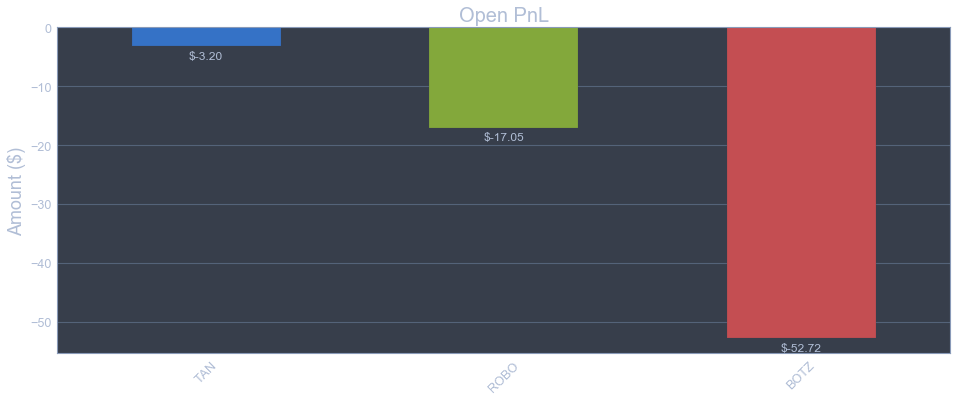

In [29]:
%matplotlib inline
positions.sort_values(by=['openPnl'], inplace=True, ascending=False)
ax = positions.plot(x='symbol', y='openPnl', kind='bar', figsize=(16, 6), legend=False)
ax.set_title('Open PnL', fontsize=20)
ax.set_ylabel('Amount ($)', fontsize=18)
ax.set_xlabel('')
ax.grid(axis='x')
rects = ax.patches
for rect, label in zip(rects, positions['openPnl']):
    height = rect.get_height()
    if height < 0:
        height -= 2.5
    ax.text(rect.get_x() + rect.get_width() / 2, height, '$%.2f' % label,
            ha='center', va='bottom', fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [30]:
print("Open PnL: %f" % (positions['openPnl'].sum()))

Open PnL: -72.969804


# Read historical market data from CSV

In [31]:
historicals = pd.read_csv("historicals.csv")
historicals['end'] =  pd.to_datetime(historicals['end'], format='%Y-%m-%d')
historicals = historicals.set_index(["symbol", "end"])

# Historical analysis

## Plot individual securities historical time series

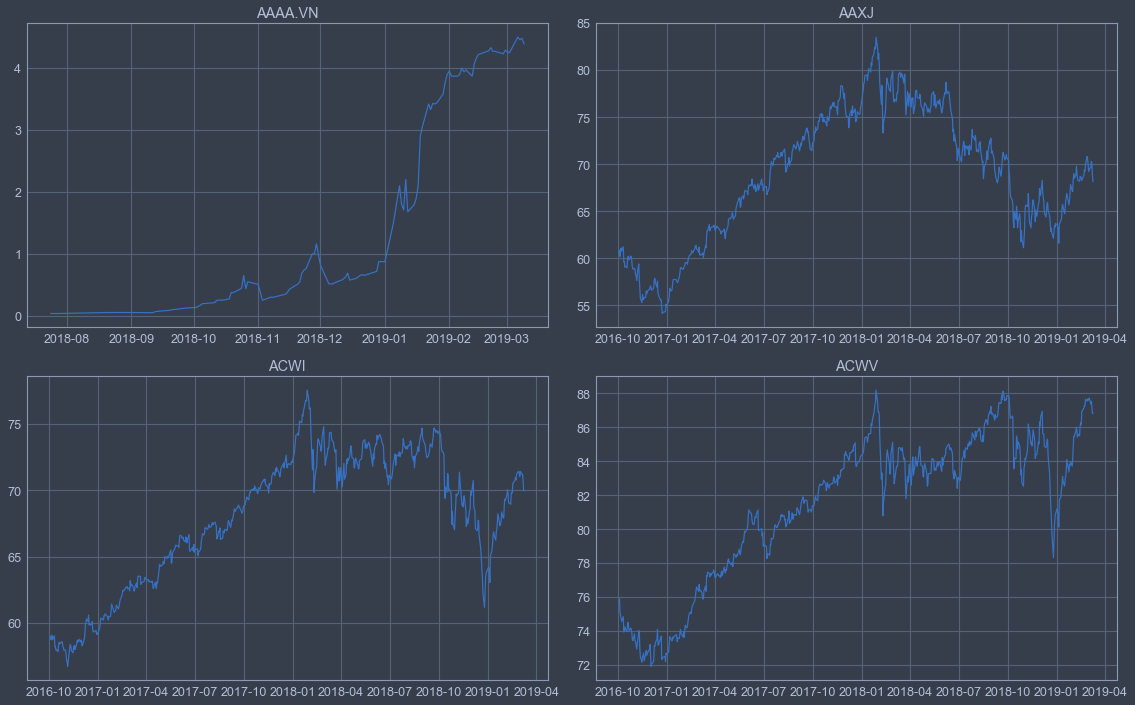

In [15]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

grouped = historicals.reset_index().set_index("end").groupby('symbol')
symbol_chunks = chunks(list(grouped.groups.keys()), 4)
for chunk in symbol_chunks:
    rows = math.ceil(len(chunk) / 2)
    fig, axs = plt.subplots(figsize=(16,10), nrows=rows, ncols=2)
    targets = zip(chunk, axs.flatten())
    for i, (key, ax) in enumerate(targets):
        ax.plot(grouped.get_group(key)['close'])
        ax.set_title(key)

    plt.tight_layout()
    plt.show()

## Calculate time series features

### Daily return

In [32]:
historicals['daily_returns'] = historicals.groupby(level='symbol')['close'].apply(lambda x: x.pct_change())

### Total return

In [33]:
historicals['total_returns'] = historicals.groupby(level='symbol')['daily_returns'].apply(lambda x: (1 + x).cumprod() - 1)

## Show total return plot

symbol
AAXJ        AxesSubplot(0.125,0.2;0.775x0.68)
ACWI        AxesSubplot(0.125,0.2;0.775x0.68)
ACWV        AxesSubplot(0.125,0.2;0.775x0.68)
AFK         AxesSubplot(0.125,0.2;0.775x0.68)
AGG         AxesSubplot(0.125,0.2;0.775x0.68)
AGQ         AxesSubplot(0.125,0.2;0.775x0.68)
AOA         AxesSubplot(0.125,0.2;0.775x0.68)
ASHX        AxesSubplot(0.125,0.2;0.775x0.68)
AUSE        AxesSubplot(0.125,0.2;0.775x0.68)
BCEKF       AxesSubplot(0.125,0.2;0.775x0.68)
BIL         AxesSubplot(0.125,0.2;0.775x0.68)
BIV         AxesSubplot(0.125,0.2;0.775x0.68)
BKLN        AxesSubplot(0.125,0.2;0.775x0.68)
BLOK        AxesSubplot(0.125,0.2;0.775x0.68)
BLV         AxesSubplot(0.125,0.2;0.775x0.68)
BND.TO      AxesSubplot(0.125,0.2;0.775x0.68)
BOND        AxesSubplot(0.125,0.2;0.775x0.68)
BOTZ        AxesSubplot(0.125,0.2;0.775x0.68)
BRZU        AxesSubplot(0.125,0.2;0.775x0.68)
BSV         AxesSubplot(0.125,0.2;0.775x0.68)
BWZ         AxesSubplot(0.125,0.2;0.775x0.68)
CANE        AxesSubplot(0.1

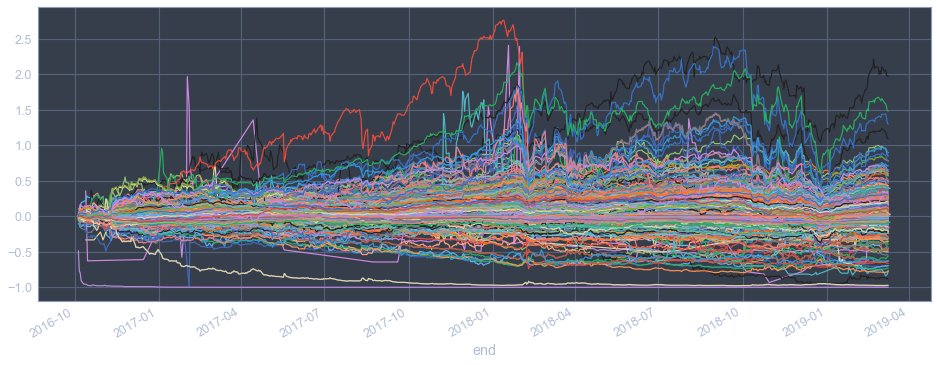

In [50]:
BLACKLISTED = ["AAAA.VN", "SMLR"]
plt.figure(figsize=(16, 6))
no_index = historicals.reset_index()
historicals.reset_index().drop(no_index[no_index['symbol'].isin(BLACKLISTED)].index).set_index("end").groupby('symbol')['total_returns'].plot()

## Show all total returns

In [51]:
historicals.groupby(level="symbol")["total_returns"].nth(-1).sort_values()

symbol
GBSNQ       -1.000000
TVIX        -0.981096
UVXY        -0.971100
HYD.TO      -0.884615
SQQQ        -0.777985
SLXXF       -0.761902
SDOW        -0.730028
HNU.TO      -0.699819
MVRBF       -0.699739
FAZ         -0.692617
SVXY        -0.662881
TAO.TO      -0.632979
SPXS        -0.625546
SPXU        -0.625321
EDZ         -0.561357
HND.TO      -0.543375
CANE        -0.506757
HOD.TO      -0.489381
SDS         -0.459697
BCEKF       -0.458537
AGQ         -0.451877
XES         -0.438522
FCG         -0.396234
PZA.TO      -0.360698
FRAK        -0.352492
SLVO        -0.315416
TUR         -0.298264
PCY.TO      -0.294118
TMF         -0.291301
WEAT        -0.276446
              ...    
VONG         0.401163
UWM          0.404269
MILN         0.426172
PALL         0.429129
HFU.TO       0.467816
ZBK.TO       0.468908
PNQI         0.472484
HXQ.TO       0.481471
PPA          0.492622
TNA          0.506579
URTY         0.516690
SSO          0.568169
XAR          0.575862
CYB.TO       0.588825
SOX

## Calculate correlations

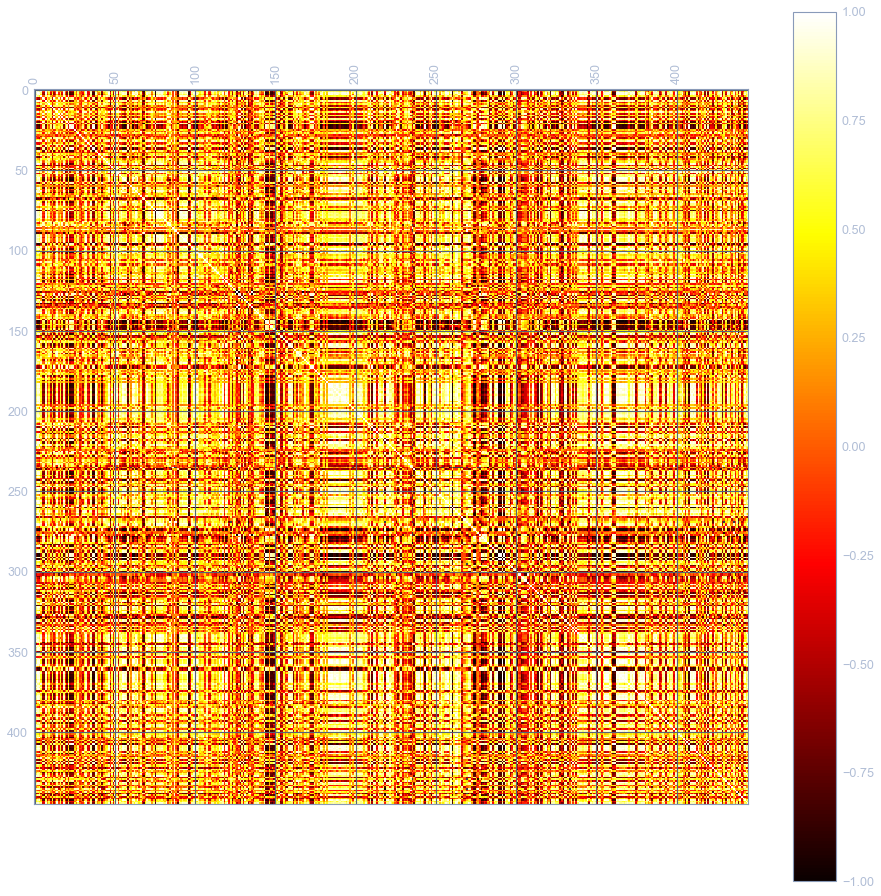

In [53]:
return_corr = historicals.reset_index().pivot('end','symbol')['total_returns'].corr()

alpha = list(historicals.reset_index('symbol'))

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111)
cax = ax.matshow(return_corr, interpolation='nearest', cmap='hot')
fig.colorbar(cax)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ax.set_xticklabels(['']+alpha)
# ax.set_yticklabels(['']+alpha)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()

In [54]:
return_corr

symbol,AAAA.VN,AAXJ,ACWI,ACWV,AFK,AGG,AGQ,AOA,ASHX,AUSE,...,ZMT.TO,ZPL.TO,ZPR.TO,ZPS.L.TO,ZRE.TO,ZRR.TO,ZSL,ZSP.TO,ZWB.TO,ZXM.B.TO
symbol,,,,,,,,,,,,,,,,,,,,,
AAAA.VN,1.000000,0.424296,-0.032164,0.217975,0.494023,0.823494,0.741908,0.009801,0.648475,0.079239,...,0.608459,0.763654,-0.666721,0.919964,0.671513,0.000712,-0.796898,0.011879,-0.070637,-0.193919
AAXJ,0.424296,1.000000,0.888333,0.756366,0.919983,-0.133802,-0.218474,0.930805,0.388065,0.716240,...,0.866877,0.127514,0.674948,-0.533684,0.489272,-0.342271,-0.214561,0.509272,0.529174,0.890952
ACWI,-0.032164,0.888333,1.000000,0.935414,0.736569,-0.486614,-0.556798,0.955039,0.040401,0.543798,...,0.906561,-0.095437,0.651200,-0.414539,0.767773,-0.467505,0.158438,0.820185,0.657779,0.913884
ACWV,0.217975,0.756366,0.935414,1.000000,0.516886,-0.538663,-0.712734,0.850359,-0.195000,0.292321,...,0.859692,-0.089450,0.423307,0.350118,0.887958,-0.524925,0.346583,0.890995,0.484198,0.766694
AFK,0.494023,0.919983,0.736569,0.516886,1.000000,-0.020066,0.040944,0.797507,0.536453,0.804501,...,0.573770,0.119642,0.686513,-0.600298,0.255442,-0.199369,-0.433458,0.281150,0.521335,0.800513
AGG,0.823494,-0.133802,-0.486614,-0.538663,-0.020066,1.000000,0.774371,-0.252071,0.599479,0.250940,...,-0.075867,0.634510,-0.099870,0.021701,-0.660622,0.511062,-0.642149,-0.769231,-0.299095,-0.400066
AGQ,0.741908,-0.218474,-0.556798,-0.712734,0.040944,0.774371,1.000000,-0.382374,0.604194,0.271042,...,-0.237842,0.354332,-0.014083,-0.477795,-0.769398,0.513820,-0.864055,-0.816505,-0.190046,-0.352073
AOA,0.009801,0.930805,0.955039,0.850359,0.797507,-0.252071,-0.382374,1.000000,0.234868,0.703652,...,0.899183,0.027858,0.756135,-0.535532,0.625044,-0.414436,-0.012358,0.669176,0.687669,0.901199
ASHX,0.648475,0.388065,0.040401,-0.195000,0.536453,0.599479,0.604194,0.234868,1.000000,0.583651,...,0.701431,0.396781,0.271195,-0.434704,-0.456340,0.329311,-0.633696,-0.425381,0.192096,0.198979


In [58]:
s = return_corr.unstack()
so = s.sort_values(kind="quicksort")

In [62]:
so.describe()

count    197927.000000
mean          0.196240
std           0.532204
min          -1.000000
25%          -0.232190
50%           0.269219
75%           0.661010
max           1.000000
dtype: float64